In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
datos = np.genfromtxt("WDBC.dat",None,delimiter="\n")

#Creacion vector datos diagnosis
vectorDiagnosis = np.zeros(len(datos))

#Creacion vector datos pruebas
matrizDatosPruebas = np.zeros([len(datos),30])
for i in range(len(datos)):
    datosFila = (datos[i].decode('UTF-8')).split(",")
    
    #Clasificacion datos diagnosis
    if datosFila[1]=='M':
        vectorDiagnosis[i]=1
    elif datosFila[1]=='B':
        vectorDiagnosis[i]=0
    
    #Clasificacion datos pruebas
    for j in range(30):
        matrizDatosPruebas[i][j]=((datosFila)[j+2])

#Creacion matriz datos
MatrizDatos = np.transpose(matrizDatosPruebas)

#Normalizacion
for i in range(len(MatrizDatos)):
    MatrizDatos[i]=(MatrizDatos[i]-np.mean(MatrizDatos[i]))/np.std(MatrizDatos[i])

/home/jadc/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [4]:
#Definicion funcion covarianza entre dos tabla de datos
def covarianza(datos1,datos2):
    prom1 = np.mean(datos1)
    prom2 = np.mean(datos2)
    return np.sum((datos1-prom1)*(datos2-prom2))/(len(datos1)-1)

In [5]:
#Construccion de la matriz de covarianza de los 31 datos (Diagnosis + 30 pruebas)
matrizCovarizanza = np.empty([len(MatrizDatos),len(MatrizDatos)])
for i in range(len(MatrizDatos)):
    for j in range(len(MatrizDatos)):
        matrizCovarizanza[i,j]=covarianza(MatrizDatos[j,:],MatrizDatos[i,:])
print(matrizCovarizanza)

[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.19415220e-01]
 [ 9.9

In [6]:
eig = np.linalg.eig(matrizCovarizanza)
autoValores = eig[0]
autoVectores = eig[1]
print("Autovalores: \n" + str(autoValores))
print("Autovectores: \n" + str(autoVectores))

Autovalores: 
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]
Autovectores: 
[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-

In [6]:
print("En base a lo obtenido con los autovalores y autovectores, se determina que las dos primeras variables son las mas importantes, pues para su magnitud en los autovalores es mucho mayor comparado contra otras variables subsiguientes.")

En base a lo obtenido con los autovalores y autovectores, se determina que las dos primeras variables son las mas importantes, pues para su magnitud en los autovalores es mucho mayor comparado contra otras variables subsiguientes.


In [23]:
#Producto punto de PC1 y PC2
#Datos Benigno
PCA1B,PCA2B=np.dot([autoVectores[0],autoVectores[1]],np.transpose(matrizDatosPruebas[vectorDiagnosis==0]))
#Datos Maligno
PCA1M,PCA2M=np.dot([autoVectores[0],autoVectores[1]],np.transpose(matrizDatosPruebas[vectorDiagnosis==1]))

Text(0.5,0,'PCA2')

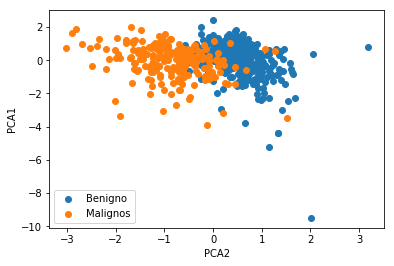

In [24]:
plt.figure()
plt.scatter(PCA2B,PCA1B,label="Benigno")
plt.scatter(PCA2M,PCA1M,label="Malignos")
plt.legend()
plt.ylabel("PCA1")
plt.xlabel("PCA2")